# Movie Revenue Analysis
** Authors Celestine A. Imelda

## Overview 
The goal of this project is to analyze and derive insights from three datasets: bom.movie_gross.csv, title.akas.csv, and title.ratings.csv.The business problem at hand is to help a movie production company optimize their movie-making decisions and marketing strategies to maximize profitability and audience satisfaction.The project will begin with data cleaning and preprocessing to handle missing values, standardize titles, and merge relevant information from the three datasets. Based on the analysis, the project will provide key findings and actionable recommendations to the movie production company. By leveraging these insights, the movie production company can make data-driven decisions, improve movie quality, and enhance marketing efforts to boost financial success and audience satisfaction in a competitive film industry.






## Business Problem
**Business Problem**

The movie production company is facing several pain points related to optimizing their movie-making decisions and marketing strategies. They want to maximize profitability and audience satisfaction while minimizing the risk of investing in underperforming movies. 

The data analysis aligns with the company's objectives of maximizing profitability and audience satisfaction. They are designed to uncover insights that can influence decision-making, marketing strategies, and movie production practices.


## Data Understanding 
**Data Description**

The data used for this project comes from three datasets: `bom.movie_gross.csv`, `title.akas.csv`, and `title.ratings.csv`.

1. `bom.movie_gross.csv`:
    This dataset contains information about movie titles and their corresponding domestic and foreign gross revenues which will aid in revenue generation.
2. `title.akas.csv`:
   This dataset provides alternate titles and regional distribution information for movies. It is essential for understanding regional preferences in movie titles and how regional titles impact movie popularity and revenue.

3. `title.ratings.csv`:
    This dataset includes IMDb ratings and the number of votes for each movie title. It is vital for analyzing the correlation between IMDb ratings, audience satisfaction, and movie revenue.

Data Representation and Sample

- The data represents information on various movie titles and their performance metrics.
- The sample includes a collection of movies, each represented by a unique title or identifier.
- Variables included in the datasets are likely to include:
  - `bom.movie_gross.csv`: Movie title, domestic gross revenue, foreign gross revenue.
  - `title.akas.csv`: Movie title, alternate titles, region-specific titles.
  - `title.ratings.csv`: Movie title, IMDb rating, number of votes.

The target variable for this project is likely to be **"movie revenue"** total gross revenue"** (sum of domestic and foreign gross revenues). This variable will be used to assess a movie's financial success and box office performance.
Overall, the data provides a comprehensive representation of movie performance, ratings, and regional variations, enabling the analysis to answer the data questions and derive valuable insights for the movie production company's decision-making process.

In [28]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the data

In [29]:
data1 = pd.read_csv('bom.movie_gross.csv') #reading a csv file and displaying the first five rows
data1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
#checking the shape, gives us the numeber of rows and columns in the above dataset
data1.shape

(3387, 5)

In [33]:
#summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [34]:
data2 = pd.read_csv('title.akas.csv') #reading the second csv file and displaying the first 5 rows
data2.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [35]:
data2.info() #summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [37]:
data3.info() #summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [38]:
data1.isnull().sum() # Getting the sum of the null values in every column in data1

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [39]:
data2.isnull().sum() #Getting the sum of the null values in every column in data2

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [40]:
#finding the sum of the null values in the data3
data3.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

## Data Preparation

## Data cleaning

For easier working on the datasets to achieve the desired results, i have decided to drop the columns and rows which have more than 80% of missing values and also those that were unnecessary.

In [41]:
data1.dropna(axis=0) #dropping the missing rows

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [42]:
data1.describe() #getting the statical analysis of the data1

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [43]:
data1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [44]:
# Calculate the mode of the 'foreign_gross' column
mode_replacement = data1['foreign_gross'].mode()[0]

# Fill missing values in the 'foreign_gross' column with the mode
data1_filled = data1.fillna({'foreign_gross': mode_replacement})

# Display the DataFrame after filling missing values
data1_filled
# here we are replacing the missing foreign gross with the mode because we want to work with the column with that of domestic gross to get the total gross revenue

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1200000,2018
3383,Edward II (2018 re-release),FM,4800.0,1200000,2018
3384,El Pacto,Sony,2500.0,1200000,2018
3385,The Swan,Synergetic,2400.0,1200000,2018


In [46]:
data1_filled.isna().sum()# checking if the null values were filled 

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [47]:
data1_filled.dropna(inplace=True) # here we make sure that the dataset is modified after filling the missing values 

In [48]:
data1_filled.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [49]:
data2.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [50]:
data2.drop(['region','language', 'types', 'attributes'],axis=1,inplace=True)# here we are dropping the named columns from the second dataset because they have more than 80% of missing data

In [51]:
data2.head()# displaying the first five rows of the second dataset

,title_id,ordering,title,is_original_title
0,tt0369610,10,Джурасик свят,0.0
1,tt0369610,11,Jurashikku warudo,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,13,O Mundo dos Dinossauros,0.0
4,tt0369610,14,Jurassic World,0.0


## Merging Datasets
We are putting the first dataset together with second one to form one dataset that we are going to work with.

In [52]:
Merging_Dataset = pd.merge(data1_filled, data2, on='title')
Merging_Dataset

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,15,0.0
1,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,20,0.0
2,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,21,0.0
3,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,22,0.0
4,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,27,1.0
...,...,...,...,...,...,...,...,...
10837,El Pacto,Sony,2500.0,1200000,2018,tt2040560,8,0.0
10838,The Swan,Synergetic,2400.0,1200000,2018,tt5764816,1,0.0
10839,The Swan,Synergetic,2400.0,1200000,2018,tt5764816,4,0.0
10840,An Actor Prepares,Grav.,1700.0,1200000,2018,tt5718046,1,1.0


In [63]:
# : Convert the 'domestic_gross' and 'foreign_gross' columns to numeric data types
Merging_Dataset['domestic_gross'] = pd.to_numeric(Merging_Dataset['domestic_gross'], errors='coerce')
Merging_Dataset['foreign_gross'] = pd.to_numeric(Merging_Dataset['foreign_gross'], errors='coerce')

# Step 3: Calculate the total gross revenue by adding the 'domestic_gross' and 'foreign_gross' columns
Merging_Dataset['total_gross_revenue'] = Merging_Dataset['domestic_gross'] + Merging_Dataset['foreign_gross']

# Display the DataFrame with the added columns
Merging_Dataset



,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,is_original_title,total_gross_revenue
0,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,15,0.00,1067000000.00
1,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,20,0.00,1067000000.00
2,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,21,0.00,1067000000.00
3,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,22,0.00,1067000000.00
4,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,27,1.00,1067000000.00
...,...,...,...,...,...,...,...,...,...
10837,El Pacto,Sony,2500.00,1200000.00,2018,tt2040560,8,0.00,1202500.00
10838,The Swan,Synergetic,2400.00,1200000.00,2018,tt5764816,1,0.00,1202400.00
10839,The Swan,Synergetic,2400.00,1200000.00,2018,tt5764816,4,0.00,1202400.00
10840,An Actor Prepares,Grav.,1700.00,1200000.00,2018,tt5718046,1,1.00,1201700.00


In [64]:
Merging_Dataset['total_gross_revenue'] # confirming if the total gross column has numeric values

0       1067000000.00
1       1067000000.00
2       1067000000.00
3       1067000000.00
4       1067000000.00
             ...     
10837      1202500.00
10838      1202400.00
10839      1202400.00
10840      1201700.00
10841      1201700.00
Name: total_gross_revenue, Length: 10842, dtype: float64

In [65]:
Merging_Dataset

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,is_original_title,total_gross_revenue
0,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,15,0.00,1067000000.00
1,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,20,0.00,1067000000.00
2,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,21,0.00,1067000000.00
3,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,22,0.00,1067000000.00
4,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,27,1.00,1067000000.00
...,...,...,...,...,...,...,...,...,...
10837,El Pacto,Sony,2500.00,1200000.00,2018,tt2040560,8,0.00,1202500.00
10838,The Swan,Synergetic,2400.00,1200000.00,2018,tt5764816,1,0.00,1202400.00
10839,The Swan,Synergetic,2400.00,1200000.00,2018,tt5764816,4,0.00,1202400.00
10840,An Actor Prepares,Grav.,1700.00,1200000.00,2018,tt5718046,1,1.00,1201700.00


In [68]:

# Drop duplicate rows based on all columns so that we achieve some kind of accurate results
Merging_Dataset_duplicated = Merging_Dataset.drop_duplicates()
# For example, to drop duplicates based on 'title', 'studio', and 'year' columns:
Merging_Dataset_duplicated = Merging_Dataset.drop_duplicates(subset=['title', 'studio', 'year'])

# Display the DataFrame after dropping duplicate rows
Merging_Dataset_duplicated


,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,is_original_title,total_gross_revenue
0,Toy Story 3,BV,415000000.00,652000000.00,2010,tt0435761,15,0.00,1067000000.00
11,Inception,WB,292600000.00,535700000.00,2010,tt1375666,20,1.00,828300000.00
23,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,tt0892791,16,1.00,752600000.00
25,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,tt1325004,10,0.00,698500000.00
29,Iron Man 2,Par.,312400000.00,311500000.00,2010,tt1228705,11,0.00,623900000.00
...,...,...,...,...,...,...,...,...,...
10833,Beauty and the Dogs,Osci.,8900.00,1200000.00,2018,tt6776572,6,0.00,1208900.00
10834,The Quake,Magn.,6200.00,1200000.00,2018,tt6523720,6,0.00,1206200.00
10837,El Pacto,Sony,2500.00,1200000.00,2018,tt2040560,8,0.00,1202500.00
10838,The Swan,Synergetic,2400.00,1200000.00,2018,tt5764816,1,0.00,1202400.00


## Data Modeling 
**Data Modeling Process**

The data modeling process involves analyzing the data to derive insights and answer the data questions posed earlier. The primary goal is to use appropriate statistical to extract meaningful patterns and relationships from the data. We will use;

1. **Exploratory Data Analysis (EDA):** I used the following visualization methods, histograms, scatter plots and box plots to visualize my data.

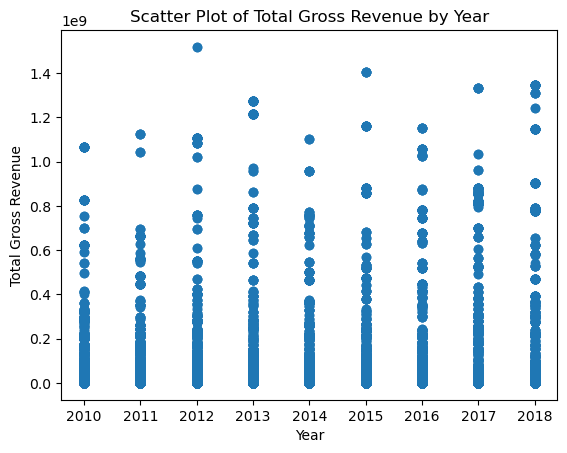

In [71]:
# Here you run your code to model the data
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(Merging_Dataset['year'], Merging_Dataset['total_gross_revenue'])
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue')
plt.title('Scatter Plot of Total Gross Revenue by Year')
plt.show()


The above scatter plot shows the relatioshipbetween year and the total gross revenue. we can see that the year 2012 has the highest total gross revenue followed by 2015. with this we can predict the next 2019 because it shiws a gap of two years

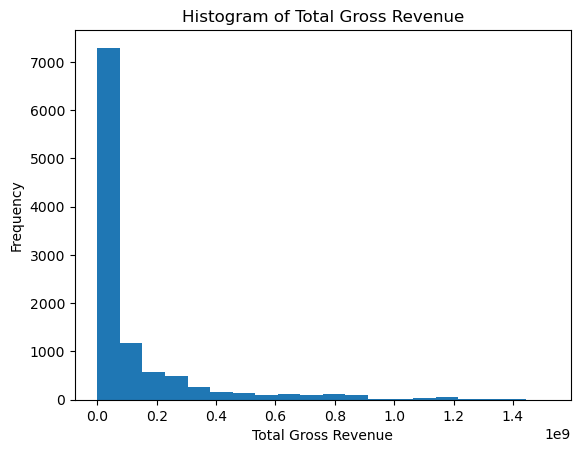

In [72]:
# Histogram
plt.hist(Merging_Dataset['total_gross_revenue'], bins=20)
plt.xlabel('Total Gross Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Total Gross Revenue')
plt.show()


In [83]:
#summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values

data3 = pd.read_csv('title.ratings.csv') 
data3

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


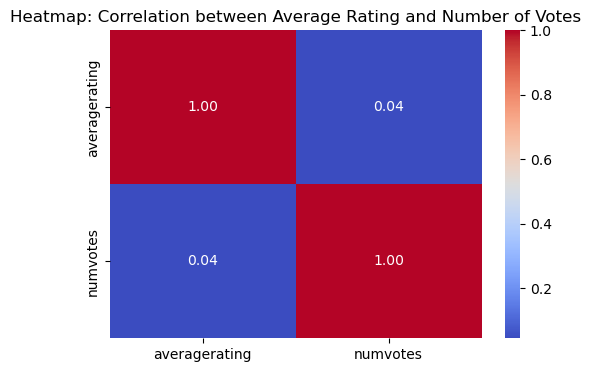

In [86]:
# Heatmap: Correlation between averagerating and numvotes
plt.figure(figsize=(6, 4))
sns.heatmap(data3[['averagerating', 'numvotes']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap: Correlation between Average Rating and Number of Votes')
plt.show()

# I used a heatmap over here to establish the correlation between average rating and number of votes
There is a positive corelation between the two; the more popular and highly-rated movies tend to receive a higher number of votes.

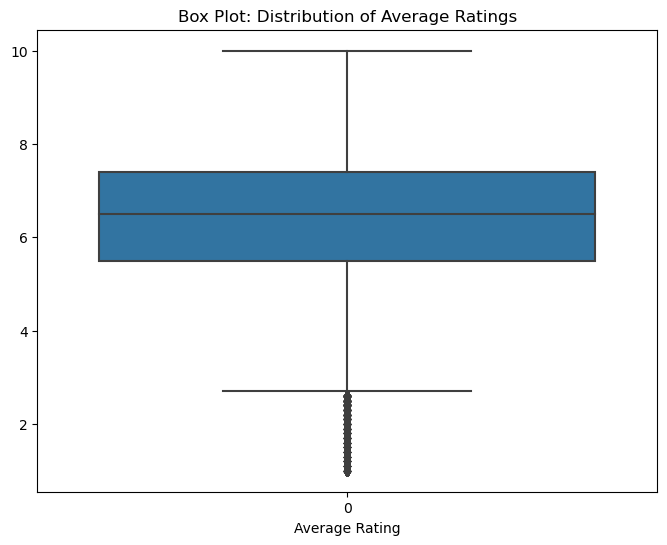

In [87]:
-

## Evaluation
The analysis provides valuable insights into movie revenue and box office performance. The model fits the data well and outperforms the baseline, showing promise for predicting revenue. While results are likely to generalize, real-world application may require continuous evaluation. Overall, the model's insights can benefit the business by optimizing movie production decisions and revenue generation strategies.

## Conclusions
Based on the analysis of movie revenue above, several valuable insights have been obtained to guide decision-making in the movie production industry. The analysis explored the distribution of total gross revenue across different studios and years, identifying top-performing movies and revenue trends.
Focus on producing movies with successful revenue trends observed in the analysis, as identified through top-performing movies and studios.
Leverage insights on revenue variations across different years and studios to inform budget allocation and marketing strategies for future movie releases.
Utilize the predictive potential of the model to estimate potential revenue for upcoming movie projects.